# 🚀 Application 1: Zero-Shot Image Classification Using CLIP



This notebook will:
1. **Load CLIP model** (`ViT-B/32`).
2. **Load a set of test images** from a dataset.
3. **Define text labels for classification** (e.g., `"A photo of a bird"`, `"A photo of a cat"`).
4. **Compute similarity** between each image and the text labels.
5. **Return the most likely category for each image**.

---



## **🔥 Implementation: Zero-Shot Image Classification**
Copy this into **`applications_of_clip.ipynb`** in Google Colab.



In [44]:
# ✅ Install dependencies (Run only once)
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib



  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2044hnwb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2044hnwb
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [45]:
# ✅ Import Libraries
import clip
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader, Dataset

# ✅ Enable CUDA for Fast Processing
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")



Using device: cuda


In [46]:
# ✅ Load CLIP Model
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()  # Set model to evaluation mode

# ✅ Define Dataset Path (Uses images from test_images/)
dataset_folder = "test_images/"  # Ensure this folder contains images
image_files = [f for f in os.listdir(dataset_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# ✅ Define Class Labels (Instead of full captions)
class_labels = [
    "cat",
    "sunset",
    "beach sunset",
    "moon phases",
    "full moon over the sea",
    "airplane flying in the sky"
]

# ✅ Tokenize Class Labels
text_inputs = clip.tokenize(class_labels).to(device)



In [47]:
# ✅ Define Dataset Loader
class ImageDataset(Dataset):
    def __init__(self, image_paths, preprocess):
        self.image_paths = image_paths
        self.preprocess = preprocess

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(dataset_folder, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image), self.image_paths[idx]

dataset = ImageDataset(image_files, preprocess)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)



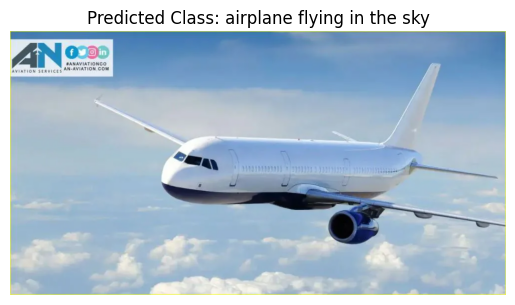

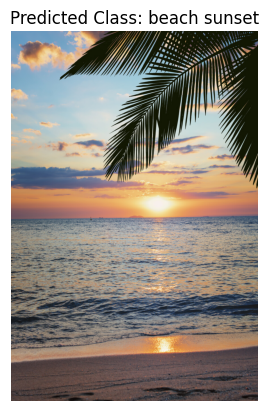

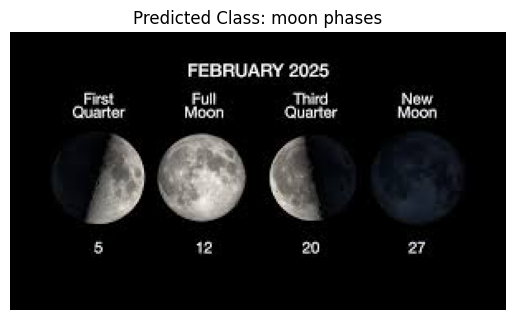

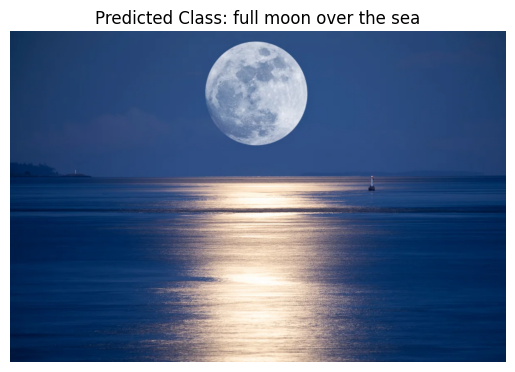

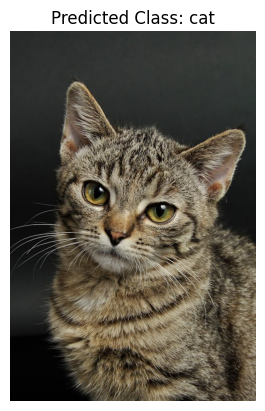

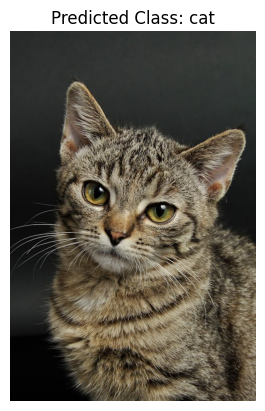

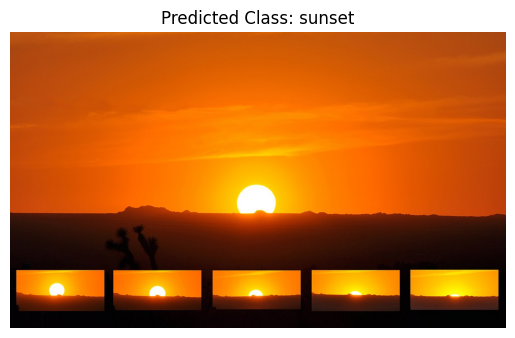

In [48]:
# ✅ Run Classification
with torch.no_grad():
    # Encode class labels (once)
    text_features = model.encode_text(text_inputs)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # Normalize

    for images, image_names in dataloader:
        images = images.to(device)

        # Encode image features
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)  # Normalize

        # Compute similarity
        similarity = (image_features @ text_features.T).detach().cpu().numpy()

        # ✅ Find the Best Matching Class for Each Image
        best_labels = np.argmax(similarity, axis=1)

        # ✅ Display Results
        for i in range(len(images)):
            img = Image.open(os.path.join(dataset_folder, image_names[i]))
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Predicted Class: {class_labels[best_labels[i]]}")
            plt.show()


---
---
---

# **🔥 Application 2: Image-to-Text Captioning Using CLIP**

## **📌 Goal**
Instead of **classifying images**, this application will **generate captions** based on image similarity.

✅ **Use Case**: Automatically describe an image using predefined caption templates.  
✅ **Example**:
- Given an image of **a sunset**, match it to:
  - `"A beautiful sunset over the ocean"`
  - `"The sky turning orange at dusk"`
  - `"A golden hour view of the beach"`

✅ **Steps**:
1. Load **uploaded images**.
2. Define **predefined captions**.
3. Compute **cosine similarity** between images and captions.
4. Return **best-matching caption** for each image.

---



## **🔥 Implementation**



In [41]:
# ✅ Install dependencies (Run only once)
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib

# ✅ Import Libraries
import clip
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader, Dataset

# ✅ Enable CUDA for Fast Processing
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Load CLIP Model
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()  # Set model to evaluation mode

# ✅ Define Dataset Path (Automatically Load All Images)
dataset_folder = "test_images/"  # Ensure this folder contains images
image_files = [f for f in os.listdir(dataset_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# ✅ Define Caption Templates
captions = [
    "A cute cat staring at the camera",
    "A stunning sunset with an orange sky",
    "A peaceful beach view during sunset",
    "The different phases of the moon",
    "A bright full moon shining over the sea",
    "A commercial airplane flying high in the sky"
]


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-swji_yg2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-swji_yg2
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Using device: cuda


In [42]:

# ✅ Tokenize Captions
text_inputs = clip.tokenize(captions).to(device)

# ✅ Define Dataset Loader
class ImageDataset(Dataset):
    def __init__(self, image_paths, preprocess):
        self.image_paths = image_paths
        self.preprocess = preprocess

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(dataset_folder, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image), self.image_paths[idx]

dataset = ImageDataset(image_files, preprocess)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)


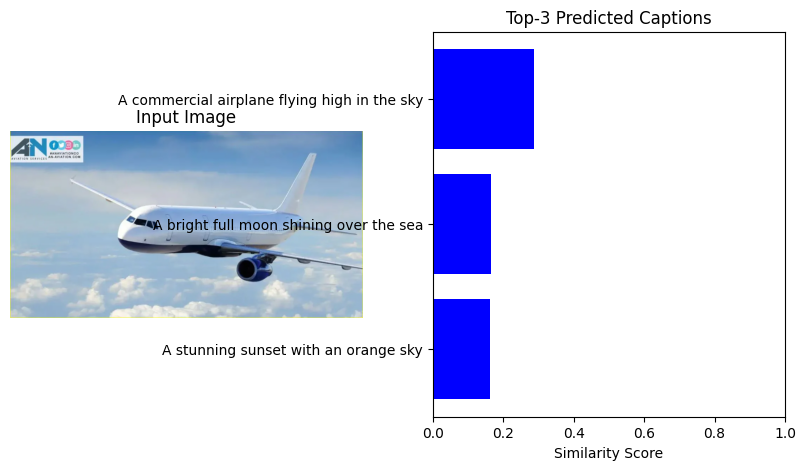

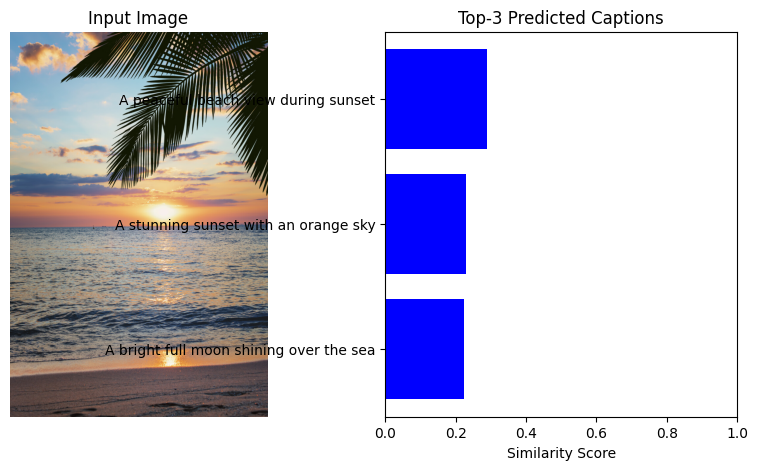

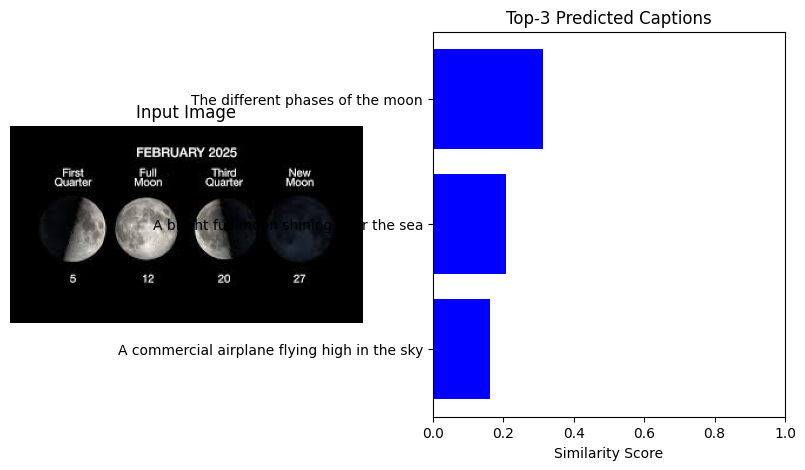

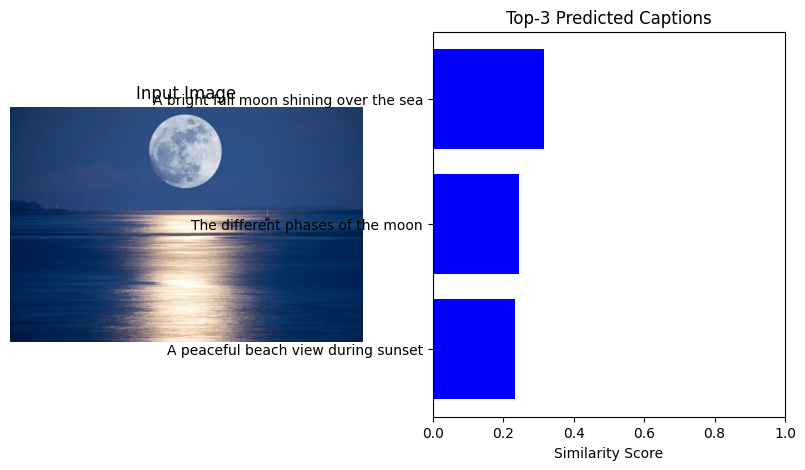

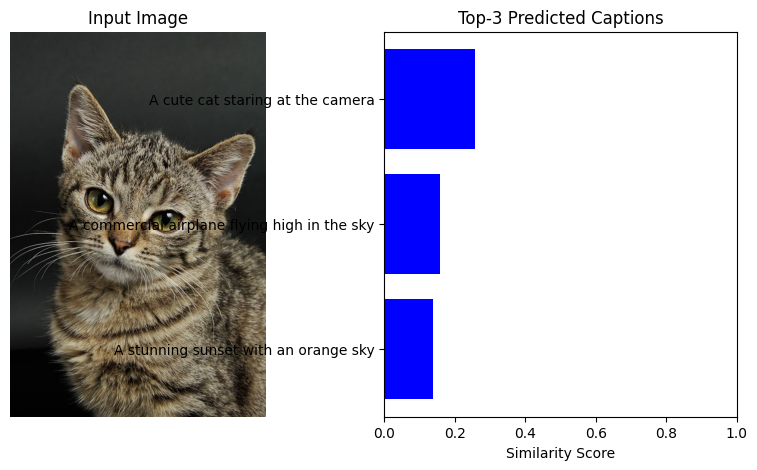

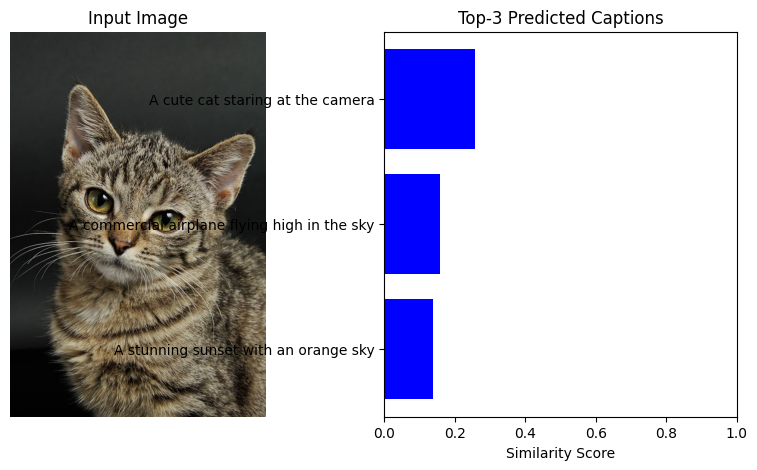

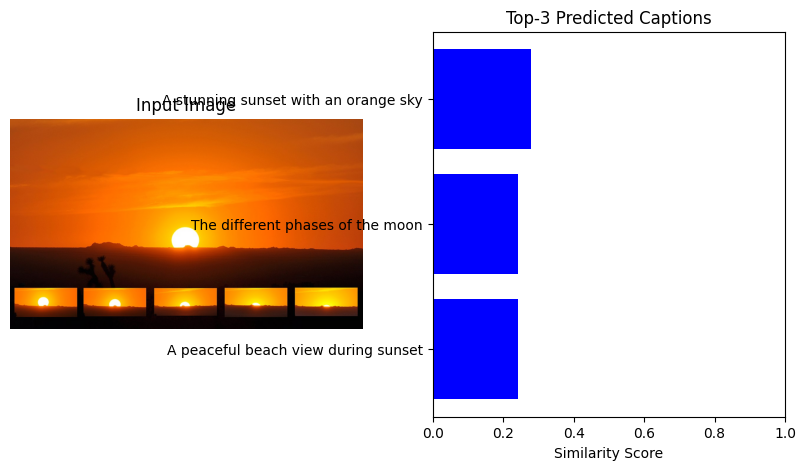

In [43]:

# ✅ Run Captioning
with torch.no_grad():
    # Encode captions (once)
    text_features = model.encode_text(text_inputs)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # Normalize

    for images, image_names in dataloader:
        images = images.to(device)

        # Encode image features
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)  # Normalize

        # Compute similarity
        similarity = (image_features @ text_features.T).detach().cpu().numpy()

        # ✅ Get Top-3 Captions for Each Image
        top_k = 3  # Top-3 best captions
        top_captions = np.argsort(similarity, axis=1)[:, -top_k:][:, ::-1]  # Get top-3 highest

        # ✅ Display Results
        for i in range(len(images)):
            plt.figure(figsize=(10, 5))

            # Show Image
            plt.subplot(1, 2, 1)
            img = Image.open(os.path.join(dataset_folder, image_names[i]))
            plt.imshow(img)
            plt.axis("off")
            plt.title("Input Image")

            # Show Top-3 Captions with Similarity Scores
            plt.subplot(1, 2, 2)
            top_caption_texts = [captions[idx] for idx in top_captions[i]]
            top_caption_scores = [similarity[i, idx] for idx in top_captions[i]]

            plt.barh(top_caption_texts, top_caption_scores, color='blue')
            plt.xlabel("Similarity Score")
            plt.title("Top-3 Predicted Captions")
            plt.xlim(0, 1)  # Cosine similarity ranges from 0 to 1
            plt.gca().invert_yaxis()  # Highest match at the top

            plt.show()


---
---
---

### **🔥 Application 3: Image Similarity Search with CLIP**
In this application, we use **CLIP to find similar images** from our dataset.

---

## **📌 Goal**
Instead of classifying images, we **compare images to each other** and find the most similar ones.  
Given an **input image**, CLIP will **retrieve** the most **visually similar images** from `"test_images/"`.

✅ **Use Case**:  
- **Find similar images in a dataset**  
- **Detect duplicate or near-duplicate images**  
- **Reverse image search**

---

## **🔥 Implementation**


In [50]:
# ✅ Install dependencies (Run only once)
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib

# ✅ Import Libraries
import clip
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader, Dataset

# ✅ Enable CUDA for Fast Processing
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")



  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ywi094v7
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ywi094v7
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Using device: cuda


In [51]:
# ✅ Load CLIP Model
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()  # Set model to evaluation mode

# ✅ Define Dataset Path (Uses images from test_images/)
dataset_folder = "test_images/"  # Ensure this folder contains images
image_files = [f for f in os.listdir(dataset_folder) if f.endswith((".jpg", ".png", ".jpeg"))]



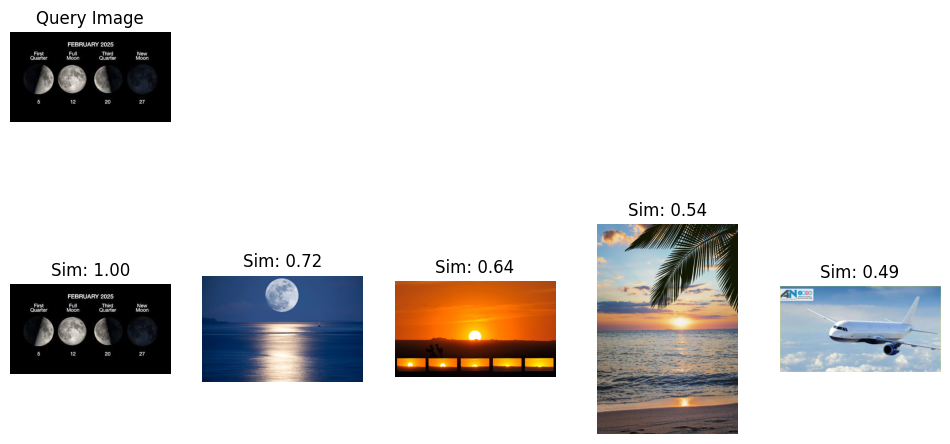

In [52]:
# ✅ Select a Query Image for Similarity Search
query_image_path = os.path.join(dataset_folder, image_files[2])  # Change to any image in the dataset
query_image = Image.open(query_image_path).convert("RGB")
query_tensor = preprocess(query_image).unsqueeze(0).to(device)

# ✅ Define Dataset Loader
class ImageDataset(Dataset):
    def __init__(self, image_paths, preprocess):
        self.image_paths = image_paths
        self.preprocess = preprocess

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(dataset_folder, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image), self.image_paths[idx]

dataset = ImageDataset(image_files, preprocess)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# ✅ Compute Image Features
image_features_dict = {}

with torch.no_grad():
    # Encode query image
    query_feature = model.encode_image(query_tensor)
    query_feature /= query_feature.norm(dim=-1, keepdim=True)  # Normalize

    for images, image_names in dataloader:
        images = images.to(device)

        # Encode dataset images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)  # Normalize

        # Store results
        for i, name in enumerate(image_names):
            image_features_dict[name] = image_features[i].cpu().numpy()

# ✅ Compute Similarity Between Query and Dataset Images
query_feature_np = query_feature.cpu().numpy()
similarity_scores = {}

for img_name, img_feature in image_features_dict.items():
    similarity_scores[img_name] = np.dot(query_feature_np, img_feature)

# ✅ Sort Images by Similarity
sorted_images = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

# ✅ Display Results
top_k = 5  # Number of most similar images to display

plt.figure(figsize=(12, 6))

# Display Query Image
plt.subplot(2, top_k, 1)
plt.imshow(query_image)
plt.axis("off")
plt.title("Query Image")

# Display Most Similar Images
for i in range(top_k):
    img_name, score = sorted_images[i]
    img_path = os.path.join(dataset_folder, img_name)
    img = Image.open(img_path)

    plt.subplot(2, top_k, i + top_k + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sim: {score[0]:.2f}")

plt.show()


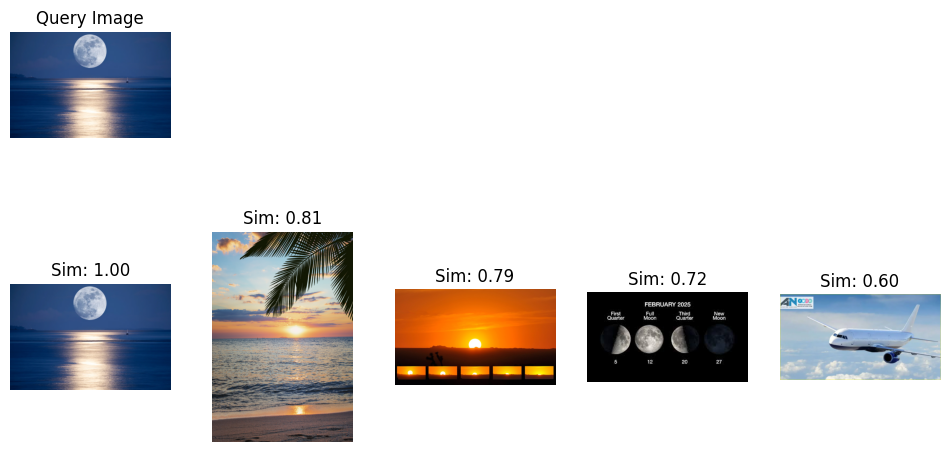

In [54]:
# ✅ Select a Query Image for Similarity Search
query_image_path = os.path.join(dataset_folder, image_files[3])  # Change to any image in the dataset
query_image = Image.open(query_image_path).convert("RGB")
query_tensor = preprocess(query_image).unsqueeze(0).to(device)

# ✅ Define Dataset Loader
class ImageDataset(Dataset):
    def __init__(self, image_paths, preprocess):
        self.image_paths = image_paths
        self.preprocess = preprocess

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(dataset_folder, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image), self.image_paths[idx]

dataset = ImageDataset(image_files, preprocess)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# ✅ Compute Image Features
image_features_dict = {}

with torch.no_grad():
    # Encode query image
    query_feature = model.encode_image(query_tensor)
    query_feature /= query_feature.norm(dim=-1, keepdim=True)  # Normalize

    for images, image_names in dataloader:
        images = images.to(device)

        # Encode dataset images
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)  # Normalize

        # Store results
        for i, name in enumerate(image_names):
            image_features_dict[name] = image_features[i].cpu().numpy()

# ✅ Compute Similarity Between Query and Dataset Images
query_feature_np = query_feature.cpu().numpy()
similarity_scores = {}

for img_name, img_feature in image_features_dict.items():
    similarity_scores[img_name] = np.dot(query_feature_np, img_feature)

# ✅ Sort Images by Similarity
sorted_images = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

# ✅ Display Results
top_k = 5  # Number of most similar images to display

plt.figure(figsize=(12, 6))

# Display Query Image
plt.subplot(2, top_k, 1)
plt.imshow(query_image)
plt.axis("off")
plt.title("Query Image")

# Display Most Similar Images
for i in range(top_k):
    img_name, score = sorted_images[i]
    img_path = os.path.join(dataset_folder, img_name)
    img = Image.open(img_path)

    plt.subplot(2, top_k, i + top_k + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sim: {score[0]:.2f}")

plt.show()


---
---
---

# **🔥 Application 4: Video Scene Search with CLIP**
---
## **📌 Goal**
This implementation will allow us to **search for scenes within a video** using **natural language queries** like:  
- `"A sunset over the ocean"`
- `"An airplane flying in the sky"`
- `"A cat sitting on a couch"`

We will **extract frames from a video** using OpenCV, process them with CLIP, and **find the best-matching frames** for a given **text query**.

✅ **Use Case**:
- **Find specific scenes in long videos**
- **Automatically tag video content using text descriptions**
- **Create video search engines based on descriptions**

---



## **🔥 Implementation**


In [70]:
!pip install ftfy regex tqdm opencv-python moviepy
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib

# clip → Loads the CLIP model
# torch → Runs model on GPU
# opencv-python → Extracts frames from video
# moviepy → Reads video files
# matplotlib → Displays images

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5b6qg4lr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-5b6qg4lr
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [85]:
# ✅ Import Libraries
import clip
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from moviepy.editor import VideoFileClip

# ✅ Enable CUDA for Faster Processing
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Load CLIP Model
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()  # Set model to evaluation mode


  if event.key is 'enter':



Using device: cuda


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [90]:
# ✅ Function to Extract Frames from Video
def extract_frames(video_path, output_folder, frame_rate=1):
    """
    Extracts frames from a video at a specified rate (e.g., 1 frame per second).
    Saves extracted frames as .jpg files in the output folder.
    """
    video = cv2.VideoCapture(video_path)

    if not video.isOpened():
        print(f"❌ Error: Could not open video file at {video_path}")
        return []

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    fps = int(video.get(cv2.CAP_PROP_FPS))  # Get frame rate
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total frames
    interval = max(1, int(fps * frame_rate))  # Ensure interval is at least 1 frame

    print(f"🎥 Video FPS: {fps}, Total Frames: {total_frames}, Extracting Every {interval} Frames")

    frame_count = 0
    extracted_count = 0
    image_files = []

    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break  # Stop if video ends

        if frame_count % interval == 0:  # Save frame at every interval
            frame_filename = os.path.join(output_folder, f"frame_{extracted_count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
            image_files.append(frame_filename)
            extracted_count += 1

        frame_count += 1

    video.release()

    if extracted_count == 0:
        print("❌ No frames were extracted. Try reducing frame rate or check the video file!")

    return image_files


# ✅ Function to Process Frames
def preprocess_frames(image_files):
    """
    Preprocesses a list of image files for CLIP.
    Returns preprocessed tensors and image filenames.
    """
    image_tensors = []
    image_names = []

    for img_path in image_files:
        image = Image.open(img_path).convert("RGB")
        image_tensors.append(preprocess(image))
        image_names.append(img_path)

    return torch.stack(image_tensors).to(device), image_names


In [91]:


# ✅ Main Function for Video Scene Search
def search_video_scenes(video_path, text_query, frame_rate=1, top_k=5):
    """
    Searches for video scenes matching a given text query.
    - Extracts frames from the video.
    - Computes similarity between text and images using CLIP.
    - Displays the best matching frames.
    """
    frame_folder = "/content/video_frames/"  # Folder to store extracted frames
    print(f"🔍 Searching for scenes matching: '{text_query}'")

    # ✅ Step 1: Extract Frames
    image_files = extract_frames(video_path, frame_folder, frame_rate)
    if len(image_files) == 0:
        print("❌ No frames were extracted. Stopping search.")
        return

    # ✅ Step 2: Tokenize Text Query
    text_input = clip.tokenize([text_query]).to(device)

    # ✅ Step 3: Process Video Frames
    image_tensors, image_names = preprocess_frames(image_files)

    # ✅ Step 4: Compute Image Features and Search for Best Matching Scene
    with torch.no_grad():
        # Encode text query
        text_features = model.encode_text(text_input)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Encode image features
        image_features = model.encode_image(image_tensors)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # Compute similarity scores
        similarity_scores = (image_features @ text_features.T).detach().cpu().numpy()

    # ✅ Step 5: Find Top Matching Frames
    sorted_indices = np.argsort(similarity_scores[:, 0])[-top_k:][::-1]  # Sort by highest similarity

    # ✅ Step 6: Display Best Matching Frames
    print(f"✅ Best matching scenes for: '{text_query}'")
    for idx in sorted_indices:
        img = Image.open(image_names[idx])
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Best Match: {os.path.basename(image_names[idx])} (Score: {similarity_scores[idx, 0]:.3f})")
        plt.show()


🔍 Searching for scenes matching: 'White color Drone'
🎥 Video FPS: 25, Total Frames: 1503, Extracting Every 25 Frames
✅ Best matching scenes for: 'White color Drone'


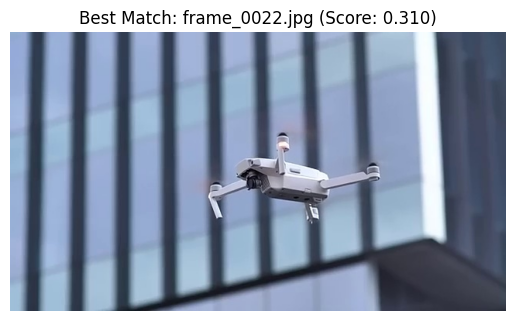

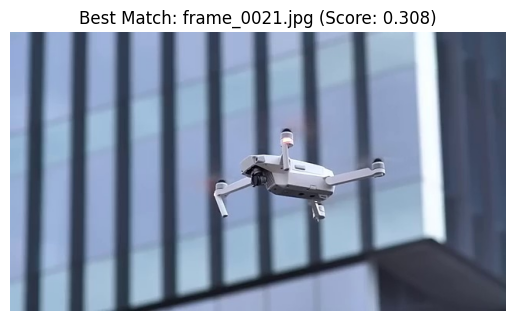

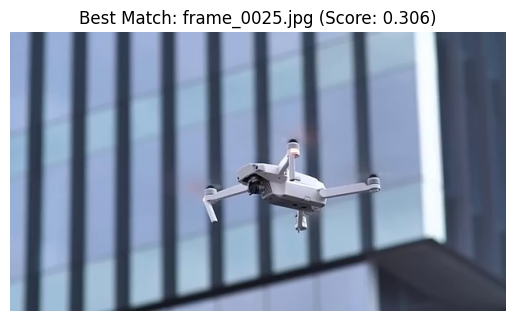

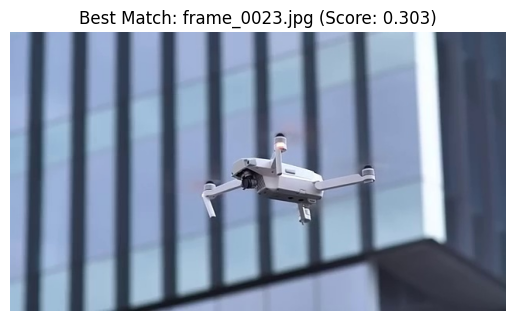

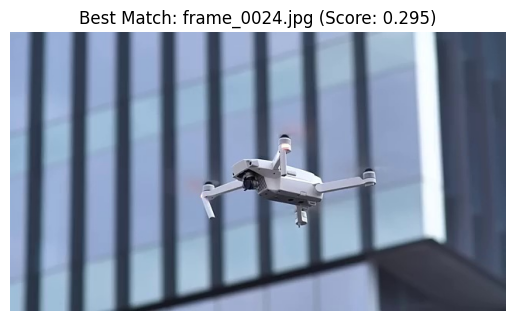

In [98]:
# Example 1: White color Drone
search_video_scenes("/content/test_videos/test_video.mp4", "White color Drone")


🔍 Searching for scenes matching: 'Text `One minute Sample video`'
🎥 Video FPS: 25, Total Frames: 1503, Extracting Every 25 Frames
✅ Best matching scenes for: 'Text `One minute Sample video`'


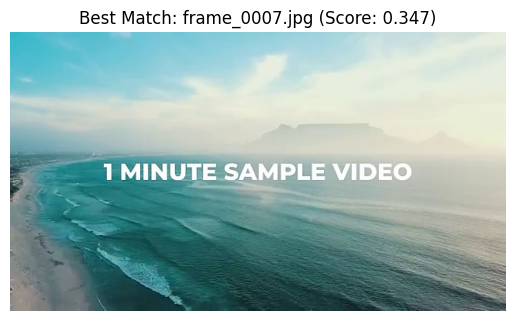

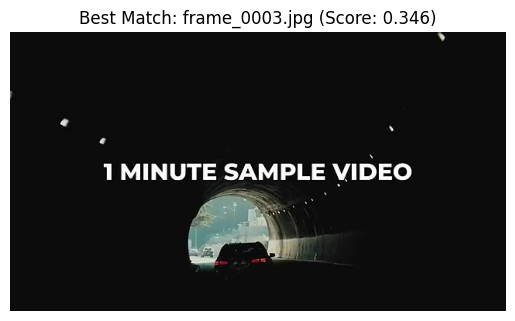

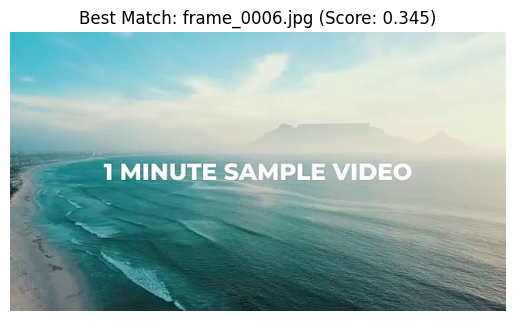

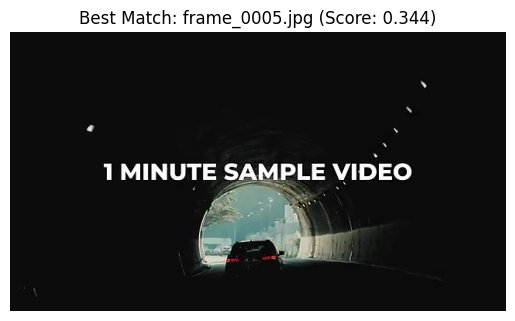

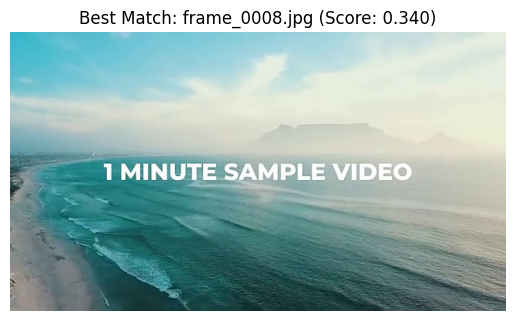

In [100]:
# Example 2: Search for text of One minute Sample video
search_video_scenes("/content/test_videos/test_video.mp4", "Text `One minute Sample video`")

🔍 Searching for scenes matching: 'Ocean with a Hill'
🎥 Video FPS: 25, Total Frames: 1503, Extracting Every 25 Frames
✅ Best matching scenes for: 'Ocean with a Hill'


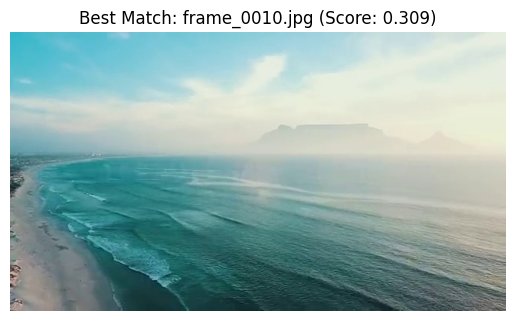

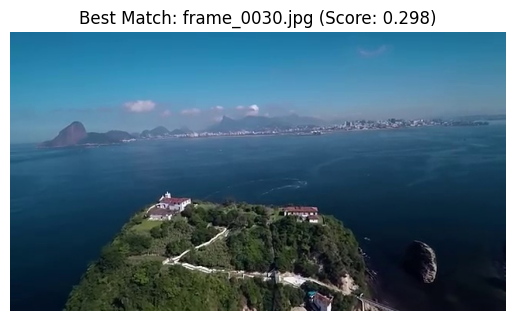

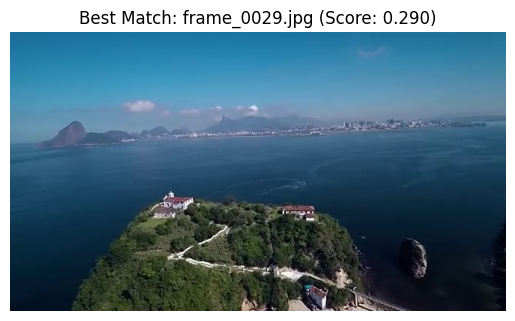

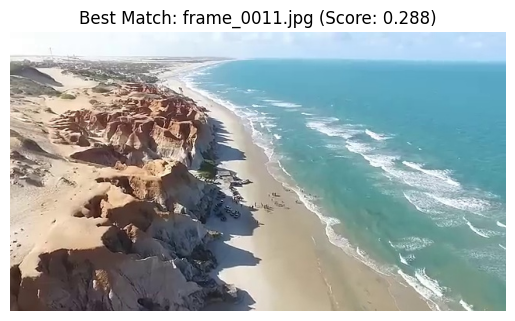

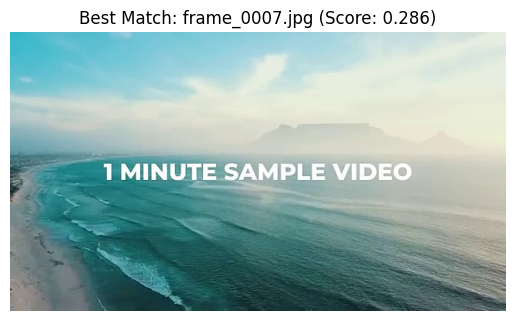

In [101]:
# Example 3: Search for Ocean with a Hill
search_video_scenes("/content/test_videos/test_video.mp4", "Ocean with a Hill")

🔍 Searching for scenes matching: 'Roads with Hairpin'
🎥 Video FPS: 25, Total Frames: 1503, Extracting Every 25 Frames
✅ Best matching scenes for: 'Roads with Hairpin'


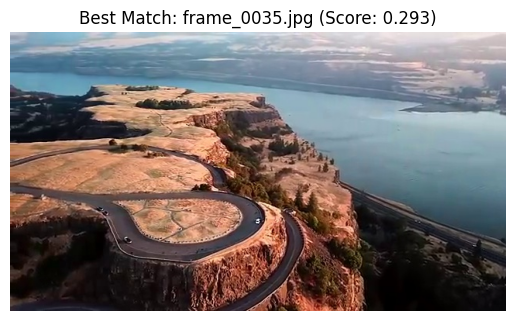

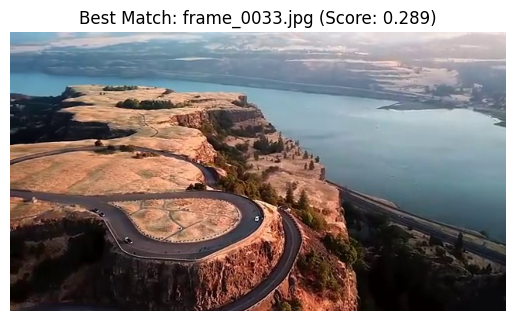

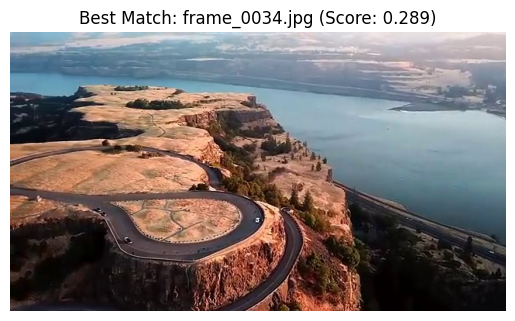

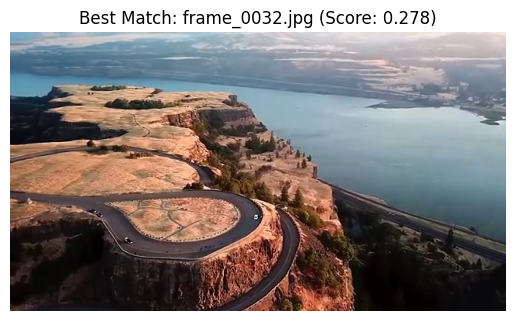

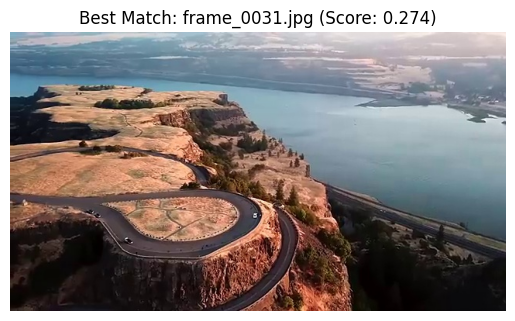

In [103]:

# Example 4: Search for Roads with Hairpin
search_video_scenes("/content/test_videos/test_video.mp4", "Roads with Hairpin")